# Quantum Simulation of Tunneling through an Eckart Barrier

In [1]:
from walsh_evolution import * 
import sys 
sys.path.insert(0, './../classical/')
from classical_evolution import *

working on iwft: 100%|██████████| 128/128 [00:00<00:00, 22499.93it/s]


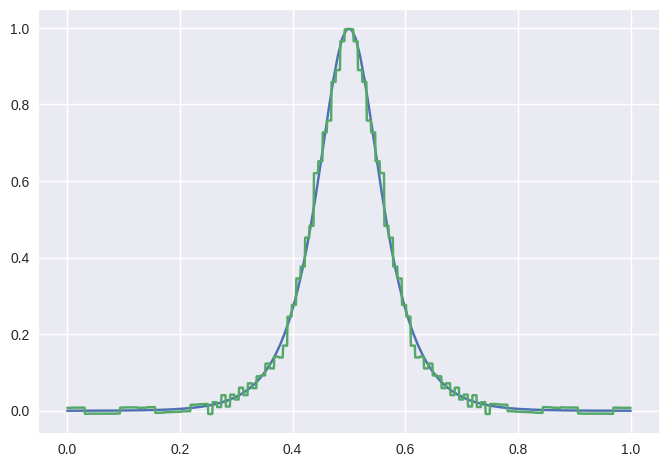

In [2]:
n = 7
N = 2**n
k_grid = np.arange(0, N, 1)
x_grid = np.linspace(0, 1, N)
repeats = 10
plot_grid = np.arange(1/(2*N*repeats), 1, 1/(N*repeats))
potential = lambda x: 1/np.cosh((x - .5)/(0.5/10))
a = wft(potential, n, x_grid)
approx = iwft(a, n, terms_kept=19)

plt.plot(x_grid, potential(x_grid), label='analytic')
plt.plot(plot_grid, np.repeat(approx, repeats))
plt.show()

working on iwft: 100%|██████████| 512/512 [00:00<00:00, 20120.71it/s]


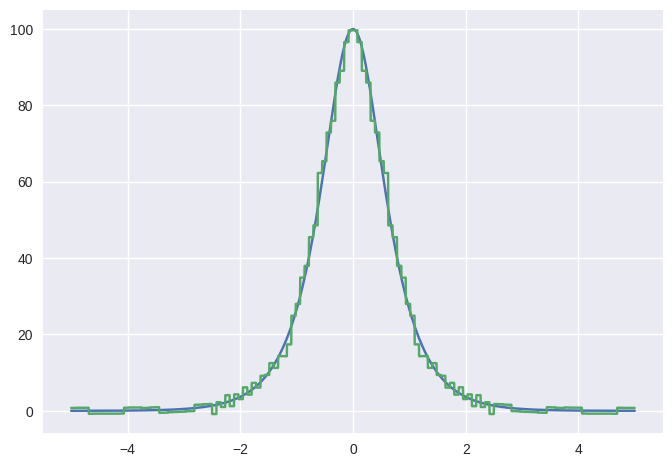

In [3]:
n = 9
N = 2**n
L = 5
k_grid = np.arange(0, N, 1)
x_grid = np.linspace(-5, 5, N)
repeats = 10
plot_grid = np.arange(-L, L, 2*L/(N*repeats))
potential = lambda x: 100/np.cosh(x/.5)
a = wft(potential, n, x_grid)
approx = iwft(a, n, terms_kept=19)
plt.plot(x_grid, potential(x_grid), label='analytic')
plt.plot(plot_grid, np.repeat(approx, repeats))
plt.show()

In [4]:
# amplitudes, t_grid, x_grid = walsh_evolve_classical(10, 10000, terms_kept=None)
# plot_time_evolution(amplitudes, t_grid, x_grid)

In [5]:
# Problem setup
T = .6
N = 2**n
x0 = -3.0  # Initial position
p0 = 15.0  # Initial momentum
sigma = 0.5
L = 5    # Spatial domain [-L, L]

def initial_wave_function(x):
    return np.exp(-(x - x0)**2 / (2 * sigma**2) + 1j*p0*(x - x0))

n_true = 15
# true = walsh_evolve_classical(n_true, 20000)[0][-1, :]
true = time_evolve(potential, initial_wave_function, 2**n_true, L, 2000, .6, f=lambda x:0, ord=2)[0][-1, :]
true = np.abs(true)**2
final_waves = []
final_waves2 = []

n_vals, K_vals = [7, 8, 9, 10, 11], [250, 500, 750, 1000, 1250]
for n, K in zip(n_vals, K_vals):
    amplitudes, t_grid, x_grid = walsh_evolve_classical(n, K, terms_kept=30*(n - 6), ord=1)
    final_waves.append(amplitudes[-1, :])
    amplitudes2, t_grid2, x_grid2 = walsh_evolve_classical(n, K, terms_kept=30*(n - 6), ord=2)
    final_waves2.append(amplitudes2[-1, :])

working on time evolution: 100%|██████████| 1250/1250 [00:00<00:00, 3157.40it/s]


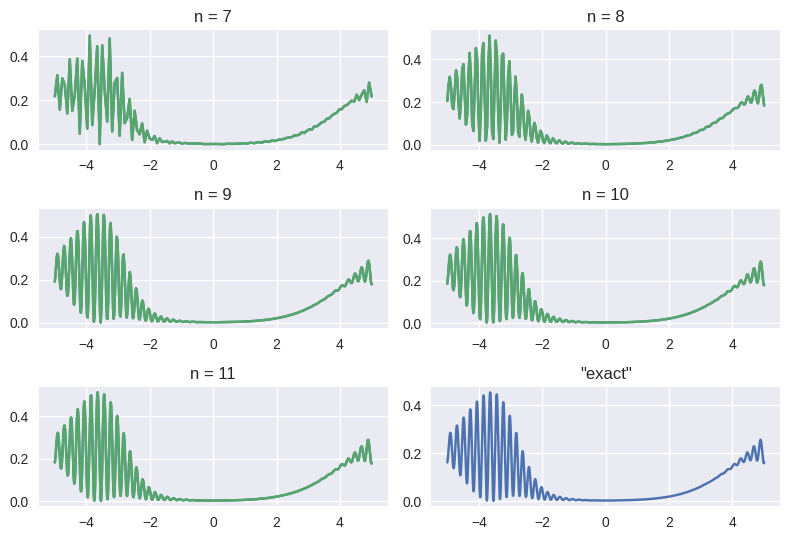

In [6]:
fig, ax = plt.subplots(3, 2)
ax = ax.ravel() 
final_errors = []
final_errors2 = []
for entry, entry2, i in zip(final_waves, final_waves2, range(len(final_waves))):
    final_errors.append(np.linalg.norm(entry[::2**i] - true[::2**(n_true - min(n_vals))]))
    final_errors2.append(np.linalg.norm(entry2[::2**i] - true[::2**(n_true - min(n_vals))]))
    x_entry = np.linspace(-5, 5, len(entry))
    ax[i].plot(x_entry, entry, label='first order')
    ax[i].plot(x_entry, entry2, label='second order')
    ax[i].set_title(f'n = {n_vals[i]}')
x_true = np.linspace(-5, 5, 2**n_true)
ax[-1].plot(x_true, true, label=n_true)
ax[-1].set_title(f'\"exact\"')
plt.tight_layout()
plt.show()

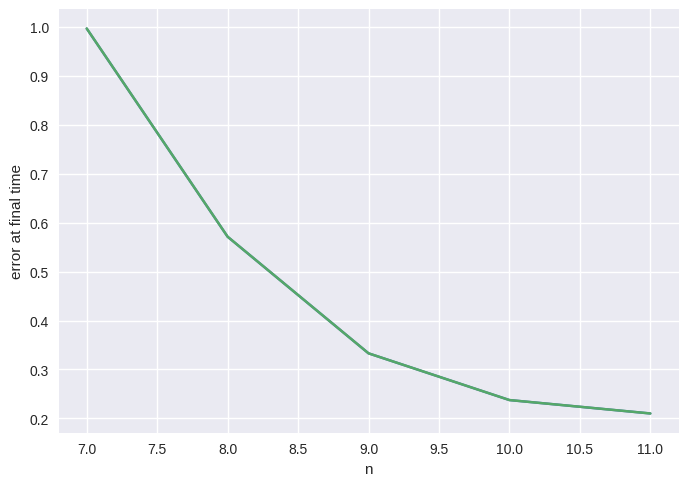

In [7]:
plt.plot(n_vals, final_errors, label='first order')
plt.plot(n_vals, final_errors2, label='second order')
plt.xlabel('n')
plt.ylabel('error at final time')
plt.show()

In [ ]:
# K = 10
# amplitudes, t_grid, x_grid = walsh_evolve_quantum(7, 50)
# plot_time_evolution(amplitudes, t_grid, x_grid)

In [ ]:
final_waves = []
final_waves2 = []
n_vals, K_vals = [6, 7], [30, 40]
for n, K in zip(n_vals, K_vals):
    amplitudes, t_grid, x_grid = walsh_evolve_quantum(n, K, ord=1)
    amplitudes2, t_grid2, x_grid2 = walsh_evolve_quantum(n, K, ord=2)
    final_waves.append(amplitudes[-1, :])
    final_waves2.append(amplitudes2[-1, :])

In [ ]:
final_errors = []
final_errors2 = []
for entry, entry2, i in zip(final_waves, final_waves2, range(len(final_waves))):
    final_errors.append(np.linalg.norm(entry[::2**i] - true[::2**(n_true - min(n_vals))]))
    final_errors2.append(np.linalg.norm(entry2[::2**i] - true[::2**(n_true - min(n_vals))]))

In [ ]:
plt.plot(n_vals, final_errors, label='first order')
plt.plot(n_vals, final_errors2, label='second order')
plt.xlabel('n')
plt.ylabel('error at final time')
plt.show()